### Zadanie 1

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.integrate


def f(x):
    return 4 / (1 + x**2)

midpoint_results = np.empty(25, dtype=np.double)
trapz_results = np.empty(25, dtype=np.double)
simps_results = np.empty(25, dtype=np.double)


def midpoint(f, n):
    h = 1 / n
    x = np.linspace(h/2, 1-h/2, n)
    return h * np.sum(f(x))
    

for i in range(1, 26):
    # n - number of nodes
    n = 2 ** i + 1
    x = np.linspace(0, 1, n)
    y = f(x)
    midpoint_results[i-1] = midpoint(f, len(x))
    trapz_results[i-1] = scipy.integrate.trapezoid(y, x)
    simps_results[i-1] = scipy.integrate.simpson(y, x=x)


# calculate relative error
midpoint_error = abs((midpoint_results - np.pi) / np.pi)
trapz_error = abs((trapz_results - np.pi) / np.pi)
simps_error = abs((simps_results - np.pi) / np.pi)

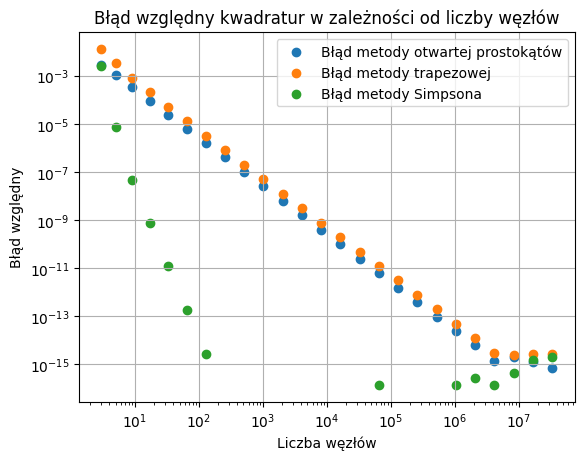

In [3]:
# draw
xs = np.array([2 ** i + 1 for i in range(1, 26)])
plt.scatter(xs, midpoint_error, label="Błąd metody otwartej prostokątów")
plt.scatter(xs, trapz_error, label="Błąd metody trapezowej")
plt.scatter(xs, simps_error, label="Błąd metody Simpsona")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd względny")
plt.xscale("log")
plt.yscale("log")
plt.title("Błąd względny kwadratur w zależności od liczby węzłów")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def find_hmin(errors):
    i = np.argmin(errors)
    return 1 / (2 ** i + 1)

print(f"Midpoint h_min = {find_hmin(midpoint_error)}")
print(f"Trapezoid h_min = {find_hmin(trapz_error)}")
print(f"Simpson's h_min = {find_hmin(simps_error)}")

#porównanie z lab1?

Midpoint h_min = 5.960464122267716e-08
Trapezoid h_min = 2.384185222581572e-07
Simpson's h_min = 0.007751937984496124


### Wyznaczanie empirycznego rzęd zbieżności

$ p \approx \frac{\log\left( \frac{E(h_{k+1})}{E(h_k)} \right)}{\log\left( \frac{h_{k+1}}{h_k} \right)} $

In [5]:
# the formula seems like its missing minus in front

# calculating order of convergance for first m results
m = 6
assert(m < 7)   # or it fails with simpon having to divide by 0

p_midpoint = np.mean(-np.log(midpoint_error[:m] / midpoint_error[1:m+1]) / np.log(xs[:m] / xs[1:m+1]))
p_trapz = np.mean(-np.log(trapz_error[:m] / trapz_error[1:m+1]) / np.log(xs[:m] / xs[1:m+1]))
p_simps = np.mean(-np.log(simps_error[:m] / simps_error[1:m+1]) / np.log(xs[:m] / xs[1:m+1]))


print("Empirical orders of convergance\n")
print(f"Midpoint rule: {p_midpoint}")
print(f"Trapezoid rule: {p_trapz}")
print(f"Simpson: {p_simps}")

Empirical orders of convergance

Midpoint rule: 1.9999063948786846
Trapezoid rule: 2.234366616687929
Simpson: 7.514713888313463


## Zadanie 2

Obliczyć $ \int_{0}^{1} \frac{4}{1 + x^2} \, dx $ metodą Gaussa-Legendre'a

In [10]:
import scipy.special

a, b = 0, 1

def gauss_legendre(roots, weighs, f):
    return np.sum(weighs * f(roots))

xs_g = np.array([2 ** i + 1 for i in range(1, 15)])

gauss_results = np.empty(len(xs_g))

for i, x in enumerate(xs_g):
    # returns roots for [-1, 1] interval
    roots, weighs = scipy.special.roots_legendre(x)
    
    # those transformations are in scipy's docs
    transformed_roots = (b-a)/2 * roots + (b+a)/2
    gauss_results[i] = (b-a)/2 * gauss_legendre(transformed_roots, weighs, f)

gauss_error = abs((gauss_results - np.pi) / np.pi)

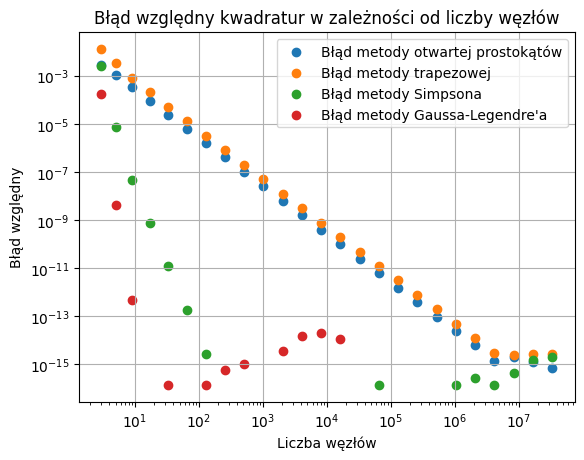

In [11]:
# draw
plt.scatter(xs, midpoint_error, label="Błąd metody otwartej prostokątów")
plt.scatter(xs, trapz_error, label="Błąd metody trapezowej")
plt.scatter(xs, simps_error, label="Błąd metody Simpsona")
plt.scatter(xs_g, gauss_error, label="Błąd metody Gaussa-Legendre'a")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd względny")
plt.xscale("log")
plt.yscale("log")
plt.title("Błąd względny kwadratur w zależności od liczby węzłów")
plt.legend()
plt.grid()
plt.show()